In [10]:
options(repr.plot.width=4, repr.plot.height=3)
require(pheatmap)
require(data.table)
require(tidyverse)

## 1. load data

In [3]:
dat.pro_ps.wd<- fread("../dat/1901/alpha_beta.promoter.long_100bin_transcripts_ps_smoothed.txt")%>%
    group_by(celltype)%>%spread(key = bin,value = percent_open)
dat.pro_ps.raw <- fread("../dat/1901/alpha_beta.promoter.long_100bin_transcripts_ps_raw.txt")

head(dat.pro_ps.wd)
tail(dat.pro_ps.wd)
dim(dat.pro_ps.wd)
table(dat.pro_ps.wd$celltype)

gene_tr.idx,celltype,1,2,3,4,5,6,7,8,⋯,91,92,93,94,95,96,97,98,99,100
AAGAB_42733,alpha,0.517475430,0.4584599115,0.40253285,0.349621593,0.299653469,0.252555820,0.208255983,0.1666812969,⋯,20.073912,20.958403,21.861378,22.782948,23.723223,24.682317,25.660339,26.657403,27.673618,28.709097
AAMDC_22628,alpha,0.107309404,0.0905332797,0.07479448,0.060041427,0.046222515,0.033286159,0.021180767,0.0098547474,⋯,30.158963,31.859239,33.608425,35.406036,37.251593,39.144612,41.084613,43.071114,45.103632,47.181686
AATF_55762,alpha,0.052832477,0.0434042464,0.03464963,0.026548186,0.019079467,0.012223029,0.005958428,0.0002652184,⋯,14.783726,15.832790,16.920715,18.046729,19.210057,20.409928,21.645568,22.916203,24.221063,25.559372
ABCA2_129618,alpha,0.028167395,0.0230714302,0.01826746,0.013753604,0.009527968,0.005588668,0.001933818,-0.0014384706,⋯,5.266054,5.504649,5.747715,5.995334,6.247590,6.504564,6.766340,7.033000,7.304627,7.581303
ABCB1_117182,beta,0.003574929,0.0003861186,-0.00206902,-0.003813677,-0.004871042,-0.005264307,-0.005016662,-0.0041512974,⋯,4.321622,4.635768,4.963775,5.305248,5.659789,6.027000,6.406485,6.797846,7.200686,7.614609
ABCB10_11455,alpha,0.354779695,0.2989321545,0.24618759,0.196418305,0.149496610,0.105294810,0.063685213,0.0245401246,⋯,25.242513,26.504026,27.799714,29.129184,30.492040,31.887888,33.316332,34.776977,36.269429,37.793293


gene_tr.idx,celltype,1,2,3,4,5,6,7,8,⋯,91,92,93,94,95,96,97,98,99,100
ZSWIM5_3921,beta,0.905616254,0.72566900,0.55858973,0.40451444,0.26357912,0.13591975,0.02167233,-0.07902716,⋯,13.0153363,13.3237773,13.646680,13.9833003,14.3328942,14.6947175,15.0680261,15.4520761,15.8461232,16.2494233
ZSWIM7_53953,alpha,0.370445702,0.31089499,0.25486525,0.20221831,0.15281599,0.10652011,0.06319250,0.02269500,⋯,24.9517283,26.3641159,27.822880,29.3271461,30.8760387,32.4686831,34.1042041,35.7817270,37.5003765,39.2592779
ZSWIM8_14081,alpha,0.428704019,0.39152466,0.35625381,0.32279802,0.29106390,0.26095802,0.23238696,0.20525731,⋯,12.7607191,13.1105608,13.458927,13.8062725,14.1530512,14.4997176,14.8467259,15.1945304,15.5435854,15.8943452
ZZEF1_52562,alpha,3.628494909,3.83723216,4.03752532,4.22943972,4.41304069,4.58839357,4.75556369,4.91461637,⋯,0.1787657,0.1670852,0.157122,0.1490678,0.1431143,0.1394534,0.1382769,0.1397765,0.1441439,0.1515711
ZZEF1_52568,alpha,-0.003552642,-0.00771986,-0.01138294,-0.01451242,-0.01707885,-0.01905275,-0.02040468,-0.02110516,⋯,16.3651026,17.3965361,18.460209,19.5557453,20.6827691,21.8409044,23.0297752,24.2490056,25.4982196,26.7770413
ZZZ3_5178,alpha,0.553389422,0.49684720,0.44360701,0.39353162,0.34648381,0.30232635,0.26092201,0.22213357,⋯,33.9751645,35.6904905,37.454158,39.2656008,41.1242532,43.0295489,44.9809220,46.9778065,49.0196364,51.1058456


[1] 3219  102


alpha  beta 
 2315   904 

## 2. updated cluster 
[QuickR](https://www.statmethods.net/advstats/cluster.html) introduces the following methods categories:
1. Partitioning based methods or Centroid-based clustering: `kmeans`, `pam`
2. Hierarchical Agglomerative: `hclust`, `pvclust`
3. Model based: `mclust`
4. Density-based: [`DBSCAN`](https://en.wikipedia.org/wiki/DBSCAN)

More complete intro can be found [cluster analysis@WIKI](https://en.wikipedia.org/wiki/Cluster_analysis)
Also they introduced:
1. cluster compare: `fpc::cluster.stats`

Because the goal is to find dynamical patterns, I would like to choose 1. (i.e. kmeans or pam)


In [4]:
require(fpc)
dat.sub <- dat.pro_ps.wd%>%
    as.data.frame()%>%
    filter(celltype=='beta')%>%
    column_to_rownames("gene_tr.idx")%>%
    select(-celltype)

Loading required package: fpc


### 2.1 filter max percent_open < 10% 

In [5]:
t(quantile(apply(dat.sub,1,max),probs = c(0,.05,.1,.25,.5,.75,.9,.95,1))) 
# filter on 10
tr.keep <- apply(dat.sub,1,max)>=10
table(tr.keep)
dat.sub.2 <- dat.sub[tr.keep,]

0%,5%,10%,25%,50%,75%,90%,95%,100%
0.8629039,3.121583,4.503688,7.620601,14.32729,21.85331,30.20641,33.85643,60.34608


tr.keep
FALSE  TRUE 
  307   597 

**10% can filter more than 30% genes** !!

### 2.2 filter bottom < 5% 

tr.keep
FALSE  TRUE 
  119   785 


  1   2 
653 132 

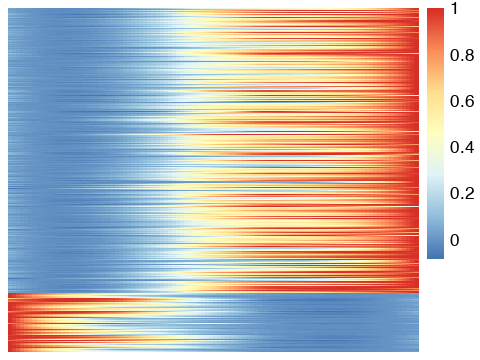

In [28]:
tr.keep <- apply(dat.sub,1,max)>=5
table(tr.keep)
dat.sub.2 <- dat.sub[tr.keep,]
dat.sub.2.scale <- t(apply(dat.sub.2,1,function(x) x/max(x)))
pk.scale<- pamk(dat.sub.2.scale,critout=F)
table(pk.scale$pamobject$clustering)
pheatmap(dat.sub.2.scale[order(pk.scale$pamobject$clustering),],scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)


  1   2 
303 350 

 1  2 
68 64 


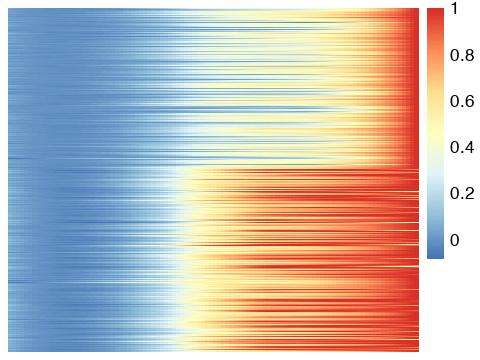

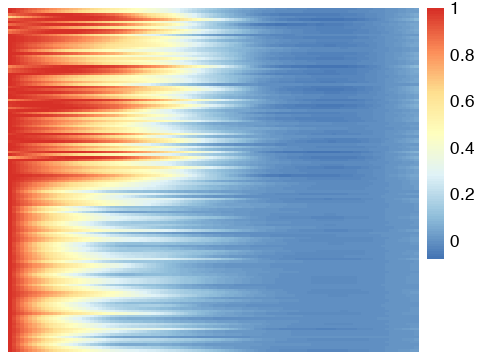

In [33]:
pk.list <- list()
for(i in 1:2){
    #cat(paste0("For Cluster ",i,"\n"))
    dat.sub.2.scale.1 <- dat.sub.2.scale[pk.scale$pamobject$clustering==i,]
    pk.scale.2<- pamk(dat.sub.2.scale.1,critout=F)
    print(table(pk.scale.2$pamobject$clustering))
    pheatmap(dat.sub.2.scale.1[order(pk.scale.2$pamobject$clustering),],
         border_color = NA,scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)
    pk.list[[i]]<-sapply(unique(pk.scale.2$pamobject$clustering),function(x)
        names(which(pk.scale.2$pamobject$clustering==x)))
}


In [36]:
cat("For cluster 1:\n")
t(lapply(pk.list[[1]],length))
cat("For cluster 2:\n")
t(lapply(pk.list[[2]],length))

For cluster 1:


303,350


For cluster 2:


68,64


In [43]:
pk.list.gene$c2

[[1]]
[1] "ABCC8"

[[2]]
[1] "ACSL1"

In [45]:
pk.list.gene<- list()
pk.list.gene$c1<- lapply(pk.list[[1]],function(x) unique(unlist(sapply(x, function(y) (unlist(strsplit(y,split = "_")))[1]))))
pk.list.gene$c2<- lapply(pk.list[[2]],function(x) unique(unlist(sapply(x, function(y) (unlist(strsplit(y,split = "_")))[1]))))
cat("#gene For cluster 1:\n")
t(lapply(pk.list.gene$c1,length))
cat("#gene For cluster 2:\n")
t(lapply(pk.list.gene$c2,length))

#gene For cluster 1:


301,347


#gene For cluster 2:


67,63


![pathways] <img src="https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/386ceb5ce115df80b42af7950b50b0cb187858c4/8-Figure4-1.png" width="400">

## 3. GO terms

In [46]:
require(enrichR)
dbs <- listEnrichrDbs()
dbs%>% filter(grepl('KEGG',libraryName) | grepl("GO_Biological_Process",libraryName))
pk.list.gene.enrichr <- list()
for(i in c("c1","c2")){
    pk.list.gene.enrichr[[i]] <- lapply(pk.list.gene[[i]],function(x) enrichr(x, c("GO_Biological_Process_2018","KEGG_2016")))
}

Loading required package: enrichR


libraryName,numTerms,geneCoverage,genesPerTerm,link
KEGG_2013,200,4128,48,http://www.kegg.jp/kegg/download/
GO_Biological_Process_2015,5192,14264,58,http://www.geneontology.org/GO.downloads.annotations.shtml
GO_Biological_Process_2013,941,7682,78,http://www.geneontology.org/GO.downloads.annotations.shtml
KEGG_2015,179,3800,48,http://www.kegg.jp/kegg/download/
KEGG_2016,293,7010,87,http://www.kegg.jp/kegg/download/
GO_Biological_Process_2017,3166,13822,21,http://www.geneontology.org/
GO_Biological_Process_2017b,10125,13247,49,http://www.geneontology.org/
GO_Biological_Process_2018,5103,14433,36,http://www.geneontology.org/


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying KEGG_2016... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying KEGG_2016... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying KEGG_2016... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying KEGG_2016... Done.
Parsing results... Done.


### c1.1

In [57]:
# c1.1
head(pk.list.gene.enrichr[["c1"]][[1]]$GO_Biological_Process_2018%>%arrange(desc(Combined.Score)))%>%select(-starts_with("Old"))
head(pk.list.gene.enrichr[["c1"]][[1]]$GO_Biological_Process_2018%>%arrange(Adjusted.P.value))%>%select(-starts_with("Old"))
head(pk.list.gene.enrichr[["c1"]][[1]]$KEGG_2016%>%arrange(desc(Combined.Score)))%>%select(-starts_with("Old"))
head(pk.list.gene.enrichr[["c1"]][[1]]$KEGG_2016%>%arrange(Adjusted.P.value))%>%select(-starts_with("Old"))

Term,Overlap,P.value,Adjusted.P.value,Z.score,Combined.Score,Genes
actin filament reorganization (GO:0090527),3/10,0.0003744727,0.1424494,-2.694373,21.25858,NEDD9;WHAMM;FRY
regulation of positive chemotaxis (GO:0050926),2/9,0.0075789698,0.2539908,-3.557341,17.36828,CNTN1;VEGFA
negative regulation of Rho protein signal transduction (GO:0035024),3/15,0.0013427752,0.1743007,-2.580924,17.06769,FLCN;ARAP3;MET
positive regulation of endothelial cell chemotaxis (GO:2001028),3/14,0.0010862643,0.1743007,-2.455200,16.75677,MET;FGFR1;VEGFA
positive regulation of neuroblast proliferation (GO:0002052),2/8,0.0059536612,0.2539908,-3.071411,15.73714,ZNF335;VEGFA
positive regulation of extracellular matrix assembly (GO:1901203),2/9,0.0075789698,0.2539908,-3.213923,15.69159,PHLDB1;SMAD3


Term,Overlap,P.value,Adjusted.P.value,Z.score,Combined.Score,Genes
actin filament reorganization (GO:0090527),3/10,0.0003744727,0.1424494,-2.694373,21.25858,NEDD9;WHAMM;FRY
myeloid leukocyte differentiation (GO:0002573),6/51,0.0001126735,0.1424494,-1.415100,12.86470,GPR183;IL31RA;GAB2;FOXP1;TGFBR2;VEGFA
neuron migration (GO:0001764),5/41,0.0003590445,0.1424494,-1.615462,12.81395,NHSL1;ELP3;FGFR1;PAFAH1B1;VEGFA
neuron projection development (GO:0031175),10/168,0.0002382518,0.1424494,-1.445000,12.05446,BLOC1S3;MICALL1;DTNBP1;TNIK;CNTN4;MAP4;FRY;ZNF335;RAB11A;MAP4K4
positive regulation of transferase activity (GO:0051347),9/138,0.0002472634,0.1424494,-1.209572,10.04556,PKIB;UBE2I;FBXW7;BMI1;MET;GRHL2;MAP3K4;IGF1R;FGFR1
negative regulation of Rho protein signal transduction (GO:0035024),3/15,0.0013427752,0.1743007,-2.580924,17.06769,FLCN;ARAP3;MET


Term,Overlap,P.value,Adjusted.P.value,Z.score,Combined.Score,Genes
Pathways in cancer_Homo sapiens_hsa05200,17/397,0.0001175621,0.01477740,-2.109779,19.09043,ITGB1;MAP2K1;SMAD3;DAPK1;DAPK2;SLC2A1;TRAF2;FOXO1;IGF1R;TGFBR2;CRKL;RASGRP3;VEGFA;GNG5;MET;BIRC2;FGFR1
Endocytosis_Homo sapiens_hsa04144,13/259,0.0001615016,0.01477740,-1.936964,16.91162,PSD;SMAD3;ARAP3;ASAP1;RAB11A;IGF1R;TGFBR2;RAB10;ACAP1;DNAJC6;STAMBP;MET;RAB11FIP5
MAPK signaling pathway_Homo sapiens_hsa04010,12/255,0.0005125390,0.02344866,-1.921409,14.55685,DUSP4;MAP2K1;PPP3R1;MKNK2;TRAF2;TAB2;MAP3K4;MAP4K4;FGFR1;TGFBR2;CRKL;RASGRP3
Renal cell carcinoma_Homo sapiens_hsa05211,6/66,0.0004707882,0.02344866,-1.847799,14.15617,FLCN;MAP2K1;SLC2A1;MET;CRKL;VEGFA
Adherens junction_Homo sapiens_hsa04520,6/74,0.0008683491,0.03178158,-1.736342,12.23933,SMAD3;MET;MLLT4;IGF1R;FGFR1;TGFBR2
Rap1 signaling pathway_Homo sapiens_hsa04015,10/211,0.0014013822,0.04274216,-1.835725,12.06126,ITGB1;MAP2K1;ARAP3;MET;MLLT4;IGF1R;FGFR1;CRKL;RASGRP3;VEGFA


Term,Overlap,P.value,Adjusted.P.value,Z.score,Combined.Score,Genes
Pathways in cancer_Homo sapiens_hsa05200,17/397,0.0001175621,0.01477740,-2.109779,19.09043,ITGB1;MAP2K1;SMAD3;DAPK1;DAPK2;SLC2A1;TRAF2;FOXO1;IGF1R;TGFBR2;CRKL;RASGRP3;VEGFA;GNG5;MET;BIRC2;FGFR1
Endocytosis_Homo sapiens_hsa04144,13/259,0.0001615016,0.01477740,-1.936964,16.91162,PSD;SMAD3;ARAP3;ASAP1;RAB11A;IGF1R;TGFBR2;RAB10;ACAP1;DNAJC6;STAMBP;MET;RAB11FIP5
MAPK signaling pathway_Homo sapiens_hsa04010,12/255,0.0005125390,0.02344866,-1.921409,14.55685,DUSP4;MAP2K1;PPP3R1;MKNK2;TRAF2;TAB2;MAP3K4;MAP4K4;FGFR1;TGFBR2;CRKL;RASGRP3
Renal cell carcinoma_Homo sapiens_hsa05211,6/66,0.0004707882,0.02344866,-1.847799,14.15617,FLCN;MAP2K1;SLC2A1;MET;CRKL;VEGFA
Adherens junction_Homo sapiens_hsa04520,6/74,0.0008683491,0.03178158,-1.736342,12.23933,SMAD3;MET;MLLT4;IGF1R;FGFR1;TGFBR2
Rap1 signaling pathway_Homo sapiens_hsa04015,10/211,0.0014013822,0.04274216,-1.835725,12.06126,ITGB1;MAP2K1;ARAP3;MET;MLLT4;IGF1R;FGFR1;CRKL;RASGRP3;VEGFA


### C1.2

In [53]:
# c1.2
head(pk.list.gene.enrichr[["c1"]][[2]]$GO_Biological_Process_2018%>%arrange(desc(Combined.Score)))%>%select(-starts_with("Old"))
head(pk.list.gene.enrichr[["c1"]][[2]]$GO_Biological_Process_2018%>%arrange(Adjusted.P.value))%>%select(-starts_with("Old"))
head(pk.list.gene.enrichr[["c1"]][[2]]$KEGG_2016%>%arrange(desc(Combined.Score)))%>%select(-starts_with("Old"))
head(pk.list.gene.enrichr[["c1"]][[2]]$KEGG_2016%>%arrange(Adjusted.P.value))%>%select(-starts_with("Old"))

Term,Overlap,P.value,Adjusted.P.value,Z.score,Combined.Score,Genes
positive regulation of transcription from RNA polymerase II promoter in response to endoplasmic reticulum stress (GO:1990440),4/12,3.948957e-05,0.03860106,-2.410969,24.44596,CEBPB;HSPA5;DDIT3;ATF3
regulation of type B pancreatic cell development (GO:2000074),3/9,4.024501e-04,0.08314351,-2.688718,21.02023,GSK3B;RHEB;ARNTL
cellular response to glucocorticoid stimulus (GO:0071385),4/18,2.248025e-04,0.06278412,-2.197775,18.46194,KLF9;NR3C1;ZFP36L2;PCK2
positive regulation of transcription from RNA polymerase II promoter in response to stress (GO:0036003),5/30,1.523437e-04,0.05857539,-1.829685,16.08178,CEBPB;HSPA5;DDIT3;HSF4;ATF3
regulation of mRNA stability (GO:0043488),10/129,8.596434e-05,0.05058439,-1.716828,16.07222,XPO1;LARP1;PSMA1;UBC;VIM;EXOSC3;TNPO1;UBA52;YWHAZ;ZFP36L2
ATP generation from ADP (GO:0006757),4/25,8.444252e-04,0.09622730,-2.162757,15.30552,TPI1;PKM;ALDOA;PGM1


Term,Overlap,P.value,Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of transcription from RNA polymerase II promoter (GO:0006357),48/1479,1.972692e-05,0.03856614,-1.378054,14.92919,HDAC5;CEBPB;CRTC3;SMARCB1;PTPRN;FHOD1;SRF;CEBPG;NRL;VLDLR;CTCF;TRIAP1;NR3C1;ETS1;DCAF6;ARNTL;MNT;RPS6KA5;ZNF608;NFIL3;CREG1;UBC;HSF4;BEND3;ZNF821;ZNF367;NCOA1;KLF13;PDE2A;TCF12;USP2;SARS;DEK;FOSL2;PPM1A;KLF6;NR4A3;CTDSP1;DDIT3;KLF9;TRIB3;QRICH1;MAML3;CDK13;UBA52;SQSTM1;ATF3;RHOQ
positive regulation of transcription from RNA polymerase II promoter in response to endoplasmic reticulum stress (GO:1990440),4/12,3.948957e-05,0.03860106,-2.410969,24.44596,CEBPB;HSPA5;DDIT3;ATF3
regulation of mRNA stability (GO:0043488),10/129,8.596434e-05,0.05058439,-1.716828,16.07222,XPO1;LARP1;PSMA1;UBC;VIM;EXOSC3;TNPO1;UBA52;YWHAZ;ZFP36L2
response to endoplasmic reticulum stress (GO:0034976),9/107,1.034975e-04,0.05058439,-1.260066,11.56232,GSK3B;CEBPB;HSPA5;DDIT3;ATP2A2;TRIB3;HYOU1;CHAC1;ATF3
positive regulation of transcription from RNA polymerase II promoter in response to stress (GO:0036003),5/30,1.523437e-04,0.05857539,-1.829685,16.08178,CEBPB;HSPA5;DDIT3;HSF4;ATF3
regulation of small GTPase mediated signal transduction (GO:0051056),10/141,1.797710e-04,0.05857539,-1.314767,11.33832,SYDE2;ARHGAP21;FGD4;DEPDC1B;ARHGEF12;RHOT1;DLC1;FAM13A;SQSTM1;RHOQ


Term,Overlap,P.value,Adjusted.P.value,Z.score,Combined.Score,Genes
Glycolysis / Gluconeogenesis_Homo sapiens_hsa00010,6/67,0.001070472,0.1724167,-2.040187,13.954174,TPI1;PKM;ALDOA;GAPDH;PGM1;PCK2
Epstein-Barr virus infection_Homo sapiens_hsa05169,10/202,0.002870232,0.1779418,-1.898639,11.113424,HDAC5;GSK3B;XPO1;POLR2B;POLR1D;TNFAIP3;VIM;POLR2I;NFKBIE;YWHAZ
Biosynthesis of amino acids_Homo sapiens_hsa01230,6/74,0.001796008,0.1724167,-1.739332,10.996383,ARG2;TPI1;PKM;PSAT1;ALDOA;GAPDH
Purine metabolism_Homo sapiens_hsa00230,9/176,0.003707121,0.1779418,-1.704275,9.539680,PKM;POLR2B;PDE2A;ADK;POLR1D;NT5M;AMPD3;POLR2I;PGM1
RNA polymerase_Homo sapiens_hsa03020,3/32,0.017705256,0.5665682,-1.601018,6.458338,POLR2B;POLR1D;POLR2I
Alzheimer's disease_Homo sapiens_hsa05010,7/168,0.027571586,0.5702959,-1.666662,5.984933,GSK3B;NDUFA11;NDUFA4L2;ATP2A2;CACNA1C;GAPDH;COX5A


Term,Overlap,P.value,Adjusted.P.value,Z.score,Combined.Score,Genes
Glycolysis / Gluconeogenesis_Homo sapiens_hsa00010,6/67,0.001070472,0.1724167,-2.040187,13.954174,TPI1;PKM;ALDOA;GAPDH;PGM1;PCK2
Biosynthesis of amino acids_Homo sapiens_hsa01230,6/74,0.001796008,0.1724167,-1.739332,10.996383,ARG2;TPI1;PKM;PSAT1;ALDOA;GAPDH
Epstein-Barr virus infection_Homo sapiens_hsa05169,10/202,0.002870232,0.1779418,-1.898639,11.113424,HDAC5;GSK3B;XPO1;POLR2B;POLR1D;TNFAIP3;VIM;POLR2I;NFKBIE;YWHAZ
Purine metabolism_Homo sapiens_hsa00230,9/176,0.003707121,0.1779418,-1.704275,9.539680,PKM;POLR2B;PDE2A;ADK;POLR1D;NT5M;AMPD3;POLR2I;PGM1
RNA polymerase_Homo sapiens_hsa03020,3/32,0.017705256,0.5665682,-1.601018,6.458338,POLR2B;POLR1D;POLR2I
Fructose and mannose metabolism_Homo sapiens_hsa00051,3/32,0.017705256,0.5665682,-1.422636,5.738761,PFKFB4;TPI1;ALDOA


### C2.1

In [55]:
head(pk.list.gene.enrichr[["c2"]][[1]]$GO_Biological_Process_2018%>%arrange(desc(Combined.Score)))%>%select(-starts_with("Old"))
head(pk.list.gene.enrichr[["c2"]][[1]]$GO_Biological_Process_2018%>%arrange(Adjusted.P.value))%>%select(-starts_with("Old"))
head(pk.list.gene.enrichr[["c2"]][[1]]$KEGG_2016%>%arrange(desc(Combined.Score)))%>%select(-starts_with("Old"))
head(pk.list.gene.enrichr[["c2"]][[1]]$KEGG_2016%>%arrange(Adjusted.P.value))%>%select(-starts_with("Old"))

Term,Overlap,P.value,Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of peptide hormone secretion (GO:0090276),7/74,5.172221e-09,1.215472e-06,-1.842008,35.14544,NEUROD1;G6PC2;ABCC8;KCNA5;STX1A;GCK;SYT7
regulation of protein secretion (GO:0050708),8/108,2.784362e-09,1.215472e-06,-1.270394,25.02580,NEUROD1;G6PC2;RSAD2;ABCC8;KCNA5;STX1A;GCK;SYT7
regulation of insulin secretion (GO:0050796),7/99,4.006475e-08,6.276811e-06,-1.297737,22.10406,NEUROD1;G6PC2;ABCC8;KCNA5;STX1A;GCK;SYT7
membrane repolarization during cardiac muscle cell action potential (GO:0086013),2/16,1.287042e-03,4.886311e-02,-2.711119,18.04360,KCNA5;ATP1A1
intracellular cholesterol transport (GO:0032367),2/11,5.963103e-04,3.503323e-02,-2.349591,17.44513,LDLRAP1;SYT7
relaxation of cardiac muscle (GO:0055119),2/12,7.140251e-04,3.728798e-02,-2.370652,17.17441,CHGA;ATP1A1


Term,Overlap,P.value,Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of peptide hormone secretion (GO:0090276),7/74,5.172221e-09,1.215472e-06,-1.842008,35.14544,NEUROD1;G6PC2;ABCC8;KCNA5;STX1A;GCK;SYT7
regulation of protein secretion (GO:0050708),8/108,2.784362e-09,1.215472e-06,-1.270394,25.02580,NEUROD1;G6PC2;RSAD2;ABCC8;KCNA5;STX1A;GCK;SYT7
regulation of insulin secretion (GO:0050796),7/99,4.006475e-08,6.276811e-06,-1.297737,22.10406,NEUROD1;G6PC2;ABCC8;KCNA5;STX1A;GCK;SYT7
potassium ion transport (GO:0006813),4/62,5.543507e-05,6.513621e-03,-1.450323,14.21359,ABCC8;KCNA5;KCNK16;KCNK17
regulation of metal ion transport (GO:0010959),3/38,2.787337e-04,2.620096e-02,-1.367050,11.18965,CASR;KCNA5;ATP1A1
metal ion transport (GO:0030001),4/102,3.819464e-04,2.863119e-02,-1.337079,10.52312,ABCC8;KCNA5;KCNK16;KCNK17


Term,Overlap,P.value,Adjusted.P.value,Z.score,Combined.Score,Genes
Insulin secretion_Homo sapiens_hsa04911,4/85,0.0001899140,0.02108045,-1.905288,16.326301,ABCC8;ATP1A1;STX1A;GCK
Type II diabetes mellitus_Homo sapiens_hsa04930,3/48,0.0005579715,0.03096742,-1.956563,14.657010,MAPK10;ABCC8;GCK
Maturity onset diabetes of the young_Homo sapiens_hsa04950,2/26,0.0034112611,0.12561404,-1.673692,9.507695,NEUROD1;GCK
Dopaminergic synapse_Homo sapiens_hsa04728,3/129,0.0092999691,0.17987395,-1.787784,8.362795,MAPK10;DDC;GNAL
Galactose metabolism_Homo sapiens_hsa00052,2/30,0.0045266323,0.12561404,-1.498133,8.086587,G6PC2;GCK
Carbohydrate digestion and absorption_Homo sapiens_hsa04973,2/45,0.0099748666,0.17987395,-1.624966,7.487332,G6PC2;ATP1A1


Term,Overlap,P.value,Adjusted.P.value,Z.score,Combined.Score,Genes
Insulin secretion_Homo sapiens_hsa04911,4/85,0.0001899140,0.02108045,-1.905288,16.326301,ABCC8;ATP1A1;STX1A;GCK
Type II diabetes mellitus_Homo sapiens_hsa04930,3/48,0.0005579715,0.03096742,-1.956563,14.657010,MAPK10;ABCC8;GCK
Maturity onset diabetes of the young_Homo sapiens_hsa04950,2/26,0.0034112611,0.12561404,-1.673692,9.507695,NEUROD1;GCK
Galactose metabolism_Homo sapiens_hsa00052,2/30,0.0045266323,0.12561404,-1.498133,8.086587,G6PC2;GCK
Dopaminergic synapse_Homo sapiens_hsa04728,3/129,0.0092999691,0.17987395,-1.787784,8.362795,MAPK10;DDC;GNAL
Carbohydrate digestion and absorption_Homo sapiens_hsa04973,2/45,0.0099748666,0.17987395,-1.624966,7.487332,G6PC2;ATP1A1


### C2.2

In [56]:
head(pk.list.gene.enrichr[["c2"]][[2]]$GO_Biological_Process_2018%>%arrange(desc(Combined.Score)))%>%select(-starts_with("Old"))
head(pk.list.gene.enrichr[["c2"]][[2]]$GO_Biological_Process_2018%>%arrange(Adjusted.P.value))%>%select(-starts_with("Old"))
head(pk.list.gene.enrichr[["c2"]][[2]]$KEGG_2016%>%arrange(desc(Combined.Score)))%>%select(-starts_with("Old"))
head(pk.list.gene.enrichr[["c2"]][[2]]$KEGG_2016%>%arrange(Adjusted.P.value))%>%select(-starts_with("Old"))

Term,Overlap,P.value,Adjusted.P.value,Z.score,Combined.Score,Genes
sphingomyelin metabolic process (GO:0006684),2/10,4.323540e-04,0.06682128,-2.323546,17.99880,SMPD4;SGMS2
response to hexose (GO:0009746),3/28,9.224727e-05,0.05294993,-1.910545,17.75095,SLC30A8;INS-IGF2;INS
striated muscle myosin thick filament assembly (GO:0071688),2/14,8.672403e-04,0.08296599,-2.481843,17.49748,MYOM1;MYBPHL
myosin filament assembly (GO:0031034),2/12,6.315475e-04,0.07250166,-2.309025,17.01137,MYOM1;MYBPHL
positive regulation of insulin receptor signaling pathway (GO:0046628),2/8,2.701162e-04,0.06682128,-1.975236,16.22984,INS-IGF2;INS
positive regulation of cellular response to insulin stimulus (GO:1900078),2/16,1.138980e-03,0.09339634,-2.287692,15.50512,INS-IGF2;INS


Term,Overlap,P.value,Adjusted.P.value,Z.score,Combined.Score,Genes
response to hexose (GO:0009746),3/28,9.224727e-05,0.05294993,-1.910545,17.75095,SLC30A8;INS-IGF2;INS
sphingomyelin metabolic process (GO:0006684),2/10,4.323540e-04,0.06682128,-2.323546,17.99880,SMPD4;SGMS2
positive regulation of insulin receptor signaling pathway (GO:0046628),2/8,2.701162e-04,0.06682128,-1.975236,16.22984,INS-IGF2;INS
response to glucose (GO:0009749),3/48,4.656535e-04,0.06682128,-1.725631,13.23916,SLC30A8;INS-IGF2;INS
myosin filament assembly (GO:0031034),2/12,6.315475e-04,0.07250166,-2.309025,17.01137,MYOM1;MYBPHL
striated muscle myosin thick filament assembly (GO:0071688),2/14,8.672403e-04,0.08296599,-2.481843,17.49748,MYOM1;MYBPHL


Term,Overlap,P.value,Adjusted.P.value,Z.score,Combined.Score,Genes
Phospholipase D signaling pathway_Homo sapiens_hsa04072,4/144,0.001104409,0.07620423,-1.896724,12.913744,KITLG;DGKI;AGPAT3;INS
Metabolic pathways_Homo sapiens_hsa01100,10/1239,0.005092932,0.08785307,-1.937089,10.227641,GSTZ1;INPP4B;SMPD4;FUT9;ACSL1;MGAT5;B3GNT5;SGMS2;DGKI;AGPAT3
Glycerophospholipid metabolism_Homo sapiens_hsa00564,3/95,0.003354840,0.07716133,-1.672391,9.528202,GPD1L;DGKI;AGPAT3
Glycosphingolipid biosynthesis - lacto and neolacto series_Homo sapiens_hsa00601,2/26,0.003022828,0.07716133,-1.521462,8.826858,FUT9;B3GNT5
Sphingolipid metabolism_Homo sapiens_hsa00600,2/47,0.009636724,0.13298679,-1.783460,8.279133,SMPD4;SGMS2
Glycerolipid metabolism_Homo sapiens_hsa00561,2/59,0.014888932,0.17122272,-1.760951,7.408563,DGKI;AGPAT3


Term,Overlap,P.value,Adjusted.P.value,Z.score,Combined.Score,Genes
Phospholipase D signaling pathway_Homo sapiens_hsa04072,4/144,0.001104409,0.07620423,-1.896724,12.913744,KITLG;DGKI;AGPAT3;INS
Glycerophospholipid metabolism_Homo sapiens_hsa00564,3/95,0.003354840,0.07716133,-1.672391,9.528202,GPD1L;DGKI;AGPAT3
Glycosphingolipid biosynthesis - lacto and neolacto series_Homo sapiens_hsa00601,2/26,0.003022828,0.07716133,-1.521462,8.826858,FUT9;B3GNT5
Metabolic pathways_Homo sapiens_hsa01100,10/1239,0.005092932,0.08785307,-1.937089,10.227641,GSTZ1;INPP4B;SMPD4;FUT9;ACSL1;MGAT5;B3GNT5;SGMS2;DGKI;AGPAT3
Sphingolipid metabolism_Homo sapiens_hsa00600,2/47,0.009636724,0.13298679,-1.783460,8.279133,SMPD4;SGMS2
Glycerolipid metabolism_Homo sapiens_hsa00561,2/59,0.014888932,0.17122272,-1.760951,7.408563,DGKI;AGPAT3


### all genes

In [58]:
pk.list.gene

$c1
$c1[[1]]
  [1] "ABCB1"          "ABCB6"          "ABCB9"          "ABHD2"         
  [5] "ABHD5"          "AC092675.3"     "ACAP1"          "ACHE"          
  [9] "ACTR1B"         "ADCK4"          "ADM"            "AFF1"          
 [13] "ALG3"           "ALOXE3"         "AMPD2"          "ANAPC5"        
 [17] "ANO10"          "ARAP3"          "ARID1B"         "ARPP19"        
 [21] "ASAP1"          "ASPHD1"         "ATP5G1"         "ATXN1"         
 [25] "B4GALT6"        "BARD1"          "BAZ1A"          "BCCIP"         
 [29] "BEST1"          "BIRC2"          "BLOC1S3"        "BMI1"          
 [33] "BRD2"           "C11orf80"       "C12orf79"       "C4orf36"       
 [37] "C8orf86"        "C9orf131"       "C9orf78"        "CADM1"         
 [41] "CADPS"          "CALU"           "CAMK1G"         "CAMTA2"        
 [45] "CAST"           "CD44"           "CDC14B"         "CHERP"         
 [49] "CLIP1"          "CLIP4"          "CNOT3"          "CNPPD1"        
 [53] "CNTN1"          "CNTN4"          "COA1"           "COMMD3"        
 [57] "COMMD3-BMI1"    "CPA5"           "CPD"            "CREB5"         
 [61] "CRKL"           "CSNK1E"         "CTSV"           "DALRD3"        
 [65] "DAPK1"          "DAPK2"          "DDX10"          "DDX19B"        
 [69] "DEDD2"          "DENND4A"        "DLL4"           "DNAJB2"        
 [73] "DNAJB5"         "DNAJC6"         "DNTTIP2"        "DOCK9"         
 [77] "DTNBP1"         "DUSP14"         "DUSP18"         "DUSP22"        
 [81] "DUSP4"          "ECE2"           "EDEM1"          "ELP3"          
 [85] "EMC6"           "ENPP2"          "EPB41L4A"       "ERCC1"         
 [89] "ESRP1"          "FAM102A"        "FAM110B"        "FAM134A"       
 [93] "FAM149A"        "FAM160A1"       "FBXL20"         "FBXO7"         
 [97] "FBXW7"          "FERMT2"         "FGD4"           "FGFR1"         
[101] "FLCN"           "FLJ00273"       "FNIP2"          "FOSL1"         
[105] "FOXJ3"          "FOXO1"          "FOXP1"          "FRY"           
[109] "GAB2"           "GABARAP"        "GBE1"           "GGA2"          
[113] "GGNBP2"         "GLTSCR1L"       "GLYR1"          "GNG5"          
[117] "GPR183"         "GPX4"           "GRHL2"          "GRIK2"         
[121] "GTPBP2"         "HDAC9"          "HIC1"           "HMGA1"         
[125] "IARS"           "IDS"            "IFRD1"          "IGF1R"         
[129] "IL31RA"         "IL6R"           "IP6K2"          "ISG20"         
[133] "ITGB1"          "ITPKC"          "KANSL1"         "KANSL3"        
[137] "KCNIP4"         "KCNK1"          "KCTD11"         "KIAA1598"      
[141] "KLC4"           "KRTAP4-5"       "LBH"            "LIG4"          
[145] "LIX1L"          "LRIG3"          "LTC4S"          "MAD2L1BP"      
[149] "MAFF"           "MAP2K1"         "MAP3K4"         "MAP3K7CL"      
[153] "MAP4"           "MAP4K4"         "MAPK6"          "MAPRE3"        
[157] "MARCH1"         "MAST4"          "MBIP"           "MBNL2"         
[161] "MCCC2"          "MEIS2"          "MESDC2"         "MET"           
[165] "MGA"            "MICALL1"        "MKNK2"          "MLLT4"         
[169] "MMP10"          "MRPL2"          "MRPS16"         "MTHFD1L"       
[173] "MTMR10"         "MYNN"           "MYO3B"          "NARG2"         
[177] "NDUFAF3"        "NEDD9"          "NELFA"          "NFAT5"         
[181] "NHSL1"          "NUFIP2"         "OCIAD1"         "OGFOD2"        
[185] "OSBPL10"        "OXCT1"          "PAFAH1B1"       "PDCL"          
[189] "PDE4DIP"        "PDLIM5"         "PHLDB1"         "PKIB"          
[193] "POLR3A"         "PPARGC1A"       "PPP1R15A"       "PPP1R1C"       
[197] "PPP3R1"         "PPP6R3"         "PRDM2"          "PSD"           
[201] "PSMA3"          "PTGES3L"        "PTGES3L-AARSD1" "PXN"           
[205] "R3HDM2"         "RAB10"          "RAB11A"         "RAB11FIP5"     
[209] "RAB40C"         "RAET1L"         "RAPH1"          "RASGRP3"       
[213] "RASSF8"         "RCC2"           "RDX"            "REV1"  